# 2014 Scraped Foreclosure Case Data

In [1]:
from pandas import DataFrame, read_csv, to_datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
%matplotlib inline

In [2]:
df = read_csv("testtest.csv")

In [3]:
df["Zip Code"] = df["Zip Code"].fillna(0.0).astype(int)
df["Zip Code"] = df["Zip Code"].replace(0, np.NaN)

df["Filing Date"] = to_datetime(df["Filing Date"])

df.head(300)

,Filing Date,Case Number,Case Type,Title,Plaintiff,Defendant,Address,Zip Code,Partial Cost
0,2014-01-02,24O14000001,Mortgage,James E Clarke vs Tiffany R Harris,James E Clarke,Tiffany R Harris,4603 Valley View Ave,21206.0,"$175,648.50"
1,2014-01-02,24O14000002,Mortgage,James W Holderness vs Intercoastal Investment ...,James W Holderness,Intercoastal Investment Trust Ltd,4718 Edmondson Ave,21229.0,"$166,358.48"
2,2014-01-02,24O14000003,Mortgage,James W Holderness vs Intercoastal Investment ...,James W Holderness,Intercoastal Investment Trust Ltd,333 N Stricker St,21223.0,"$23,189.54"
3,2014-01-02,24O14000004,Mortgage,Diane S Rosenberg vs Quandra P Freeman,Diane S Rosenberg,Quandra P Freeman,2304 Cloville Ave,21214.0,"$172,140.22"
4,2014-01-02,24O14000005,Mortgage,Diane S Rosenberg vs Laverne D Griffin,Diane S Rosenberg,Laverne D Griffin,3229 E Baltimore St,21224.0,"$199,004.34"
5,2014-01-02,24O14000006,Mortgage,Carrie M Ward vs Yolanda Clavell,Carrie M Ward,Yolanda Clavell,4702 Greenhill Ave,21206.0,"$228,612.53"
6,2014-01-02,24O14000007,Mortgage,Carrie M Ward vs Patricia C Rodriguez,Carrie M Ward,Patricia C Rodriguez,106 S Collins Ave,21229.0,"$71,203.46"
7,2014-01-02,24O14000008,Mortgage,James E Clarke vs Robert Van Horton,James E Clarke,Robert Van Horton,2312 Anoka Ave,21215.0,NaN
8,2014-01-02,24O14000009,Mortgage,James E Clarke vs Kimberly A McAfee,James E Clarke,Kimberly A McAfee,5910 Fenwick Ave,21239.0,"$134,009.42"
9,2014-01-02,24O14000010,Mortgage,"James E Clarke vs Michael L Ludwig, et al",James E Clarke,"Michael L Ludwig, et al",3910 E Pratt St,21224.0,NaN


In [4]:
print "Count of features:\n"
print df.count()

Count of features:

Filing Date     4088
Case Number     4088
Case Type       4088
Title           4088
Plaintiff       4086
Defendant       4086
Address         4067
Zip Code        3550
Partial Cost    3539
dtype: int64


In [5]:
print "NULL count:\n"
print df.isnull().sum()

NULL count:

Filing Date       0
Case Number       0
Case Type         0
Title             0
Plaintiff         2
Defendant         2
Address          21
Zip Code        538
Partial Cost    549
dtype: int64


In [6]:
new_df = DataFrame(df.groupby(df["Filing Date"].dt.week)['Case Number'].count())
new_df.columns = ["Case Count"]
new_df["Week"] = new_df.index

In [7]:
print "Distribution of cases:\n"
print new_df["Case Count"].describe()

Distribution of cases:

count     52.000000
mean      78.615385
std       15.262608
min       42.000000
25%       69.000000
50%       80.000000
75%       86.500000
max      108.000000
Name: Case Count, dtype: float64


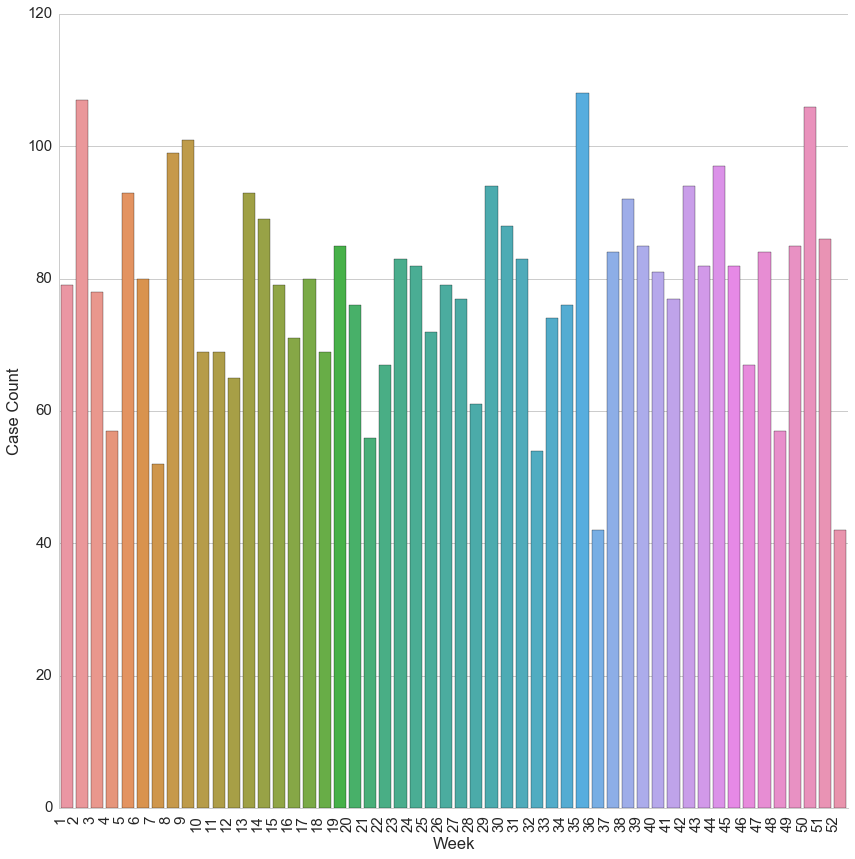

In [8]:
p = sns.factorplot(x="Week", y='Case Count', kind='bar', data=new_df, size=12)
p.set_xticklabels(rotation=90, horizontalalignment='right')

In [9]:
# import numpy as np
df.groupby(["Case Number"]).count().head(280)

,Filing Date,Case Type,Title,Plaintiff,Defendant,Address,Zip Code,Partial Cost
Case Number,,,,,,,,
24O14000001,1,1,1,1,1,1,1,1
24O14000002,1,1,1,1,1,1,1,1
24O14000003,1,1,1,1,1,1,1,1
24O14000004,1,1,1,1,1,1,1,1
24O14000005,1,1,1,1,1,1,1,1
24O14000006,1,1,1,1,1,1,1,1
24O14000007,1,1,1,1,1,1,1,1
24O14000008,1,1,1,1,1,1,1,0
24O14000009,1,1,1,1,1,1,1,1


In [10]:
df.head(280)

,Filing Date,Case Number,Case Type,Title,Plaintiff,Defendant,Address,Zip Code,Partial Cost
0,2014-01-02,24O14000001,Mortgage,James E Clarke vs Tiffany R Harris,James E Clarke,Tiffany R Harris,4603 Valley View Ave,21206.0,"$175,648.50"
1,2014-01-02,24O14000002,Mortgage,James W Holderness vs Intercoastal Investment ...,James W Holderness,Intercoastal Investment Trust Ltd,4718 Edmondson Ave,21229.0,"$166,358.48"
2,2014-01-02,24O14000003,Mortgage,James W Holderness vs Intercoastal Investment ...,James W Holderness,Intercoastal Investment Trust Ltd,333 N Stricker St,21223.0,"$23,189.54"
3,2014-01-02,24O14000004,Mortgage,Diane S Rosenberg vs Quandra P Freeman,Diane S Rosenberg,Quandra P Freeman,2304 Cloville Ave,21214.0,"$172,140.22"
4,2014-01-02,24O14000005,Mortgage,Diane S Rosenberg vs Laverne D Griffin,Diane S Rosenberg,Laverne D Griffin,3229 E Baltimore St,21224.0,"$199,004.34"
5,2014-01-02,24O14000006,Mortgage,Carrie M Ward vs Yolanda Clavell,Carrie M Ward,Yolanda Clavell,4702 Greenhill Ave,21206.0,"$228,612.53"
6,2014-01-02,24O14000007,Mortgage,Carrie M Ward vs Patricia C Rodriguez,Carrie M Ward,Patricia C Rodriguez,106 S Collins Ave,21229.0,"$71,203.46"
7,2014-01-02,24O14000008,Mortgage,James E Clarke vs Robert Van Horton,James E Clarke,Robert Van Horton,2312 Anoka Ave,21215.0,NaN
8,2014-01-02,24O14000009,Mortgage,James E Clarke vs Kimberly A McAfee,James E Clarke,Kimberly A McAfee,5910 Fenwick Ave,21239.0,"$134,009.42"
9,2014-01-02,24O14000010,Mortgage,"James E Clarke vs Michael L Ludwig, et al",James E Clarke,"Michael L Ludwig, et al",3910 E Pratt St,21224.0,NaN
